<a href="https://colab.research.google.com/github/sanatabassum-24/learn-repo/blob/master/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 01

what is Image Recognition

wt is DeepLearning

wt is Dataset

why preprocessing

wt is EDA(Exploratory Data Analysis)


In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanatabassum24","key":"a6141a48e7388e17a742ba61b7a7bb8f"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape:  {X_train.shape} Test shape:{X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape:  (60000, 28, 28) Test shape:(10000, 28, 28)


In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
x_train = X_train.reshape(-1, 28, 28, 1)
x_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped:  {x_train.shape}")

Train reshaped:  (60000, 28, 28, 1)


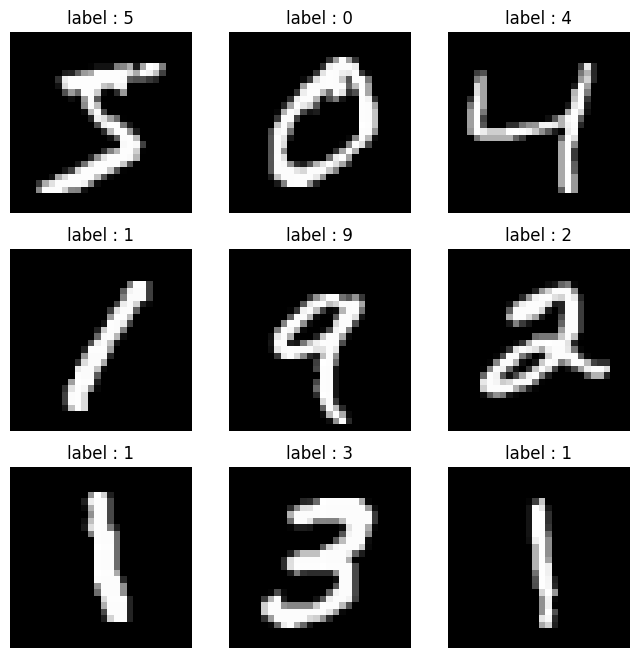

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.title(f"label : {y_train[i]}")
  plt.axis('off')
plt.show()

DAY 02

wt is Convolutional Neural Network(CNN)?

How does a model training work?

Why do we use Dropout?

How to evaluate a Model?

In [9]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10)= tf.keras.datasets.cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
print(f"Train shape:  {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Train shape:  (50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(12,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 12)     │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,314 (833.26 KB)

 Trainable params: 213,314 (833.26 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history =model.fit(x_train, y_train, epochs=5, batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8996 - loss: 0.3333 - val_accuracy: 0.9784 - val_loss: 0.0762
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9838 - loss: 0.0539 - val_accuracy: 0.9857 - val_loss: 0.0461
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9904 - loss: 0.0334 - val_accuracy: 0.9852 - val_loss: 0.0473
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9850 - val_loss: 0.0494
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9890 - val_loss: 0.0439


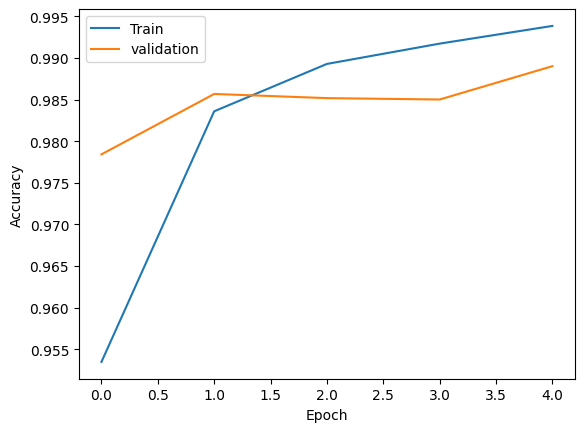

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {test_acc:.4f}")
y_pred = model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0443
Test accuracy: {test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(12,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0,25),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
datagen.fit(x_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 78ms/step - accuracy: 0.3277 - loss: 1.8321 - val_accuracy: 0.4441 - val_loss: 1.5935
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 85ms/step - accuracy: 0.5072 - loss: 1.3794 - val_accuracy: 0.4910 - val_loss: 1.4196
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.5711 - loss: 1.2168 - val_accuracy: 0.6109 - val_loss: 1.0797
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6042 - loss: 1.1289 - val_accuracy: 0.6239 - val_loss: 1.0771
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.6219 - loss: 1.0849 - val_accuracy: 0.5324 - val_loss: 1.6437
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6433 - loss: 1.0306 - val_accuracy: 0.6009 - val_loss: 1.2661
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6534 - loss: 1.0001 - val_accuracy: 0.6581 - val_loss: 1.0051
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6671 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1000
           1       0.83      0.88      0.86      1000
           2       0.65      0.53      0.59      1000
           3       0.65      0.43      0.52      1000
           4       0.64      0.63      0.64      1000
           5       0.73      0.58      0.65      1000
           6       0.62      0.88      0.72      1000
           7       0.78      0.75      0.76      1000
           8       0.76      0.89      0.82      1000
           9       0.78      0.85      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



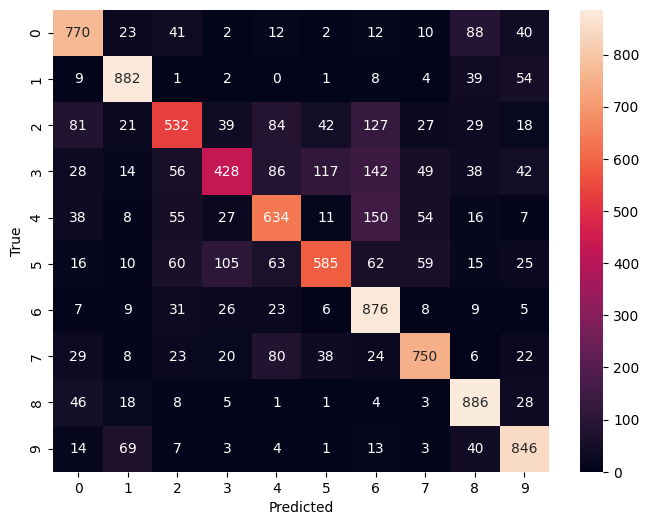

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

DAY 04

pretrained model

transfer learning

fine tune and optimize

hw to deploy a model

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 89% 194M/218M [00:00<00:00, 272MB/s]
100% 218M/218M [00:00<00:00, 297MB/s]


In [22]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training')
val_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.7834 - loss: 0.5477 - val_accuracy: 0.7980 - val_loss: 0.5226
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.8020 - loss: 0.5040 - val_accuracy: 0.7985 - val_loss: 0.5292
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.7996 - loss: 0.4955 - val_accuracy: 0.7935 - val_loss: 0.5212
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.7963 - loss: 0.4920 - val_accuracy: 0.7930 - val_loss: 0.5257
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.7918 - loss: 0.4938 - val_accuracy: 0.7985 - val_loss: 0.5448


In [27]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1750s 7s/step - accuracy: 0.8031 - loss: 0.5208 - val_accuracy: 0.7985 - val_loss: 0.5489
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1634s 7s/step - accuracy: 0.7952 - loss: 0.4798 - val_accuracy: 0.7985 - val_loss: 0.5427
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1606s 6s/step - accuracy: 0.8065 - loss: 0.4431 - val_accuracy: 0.7960 - val_loss: 0.5387


In [28]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step


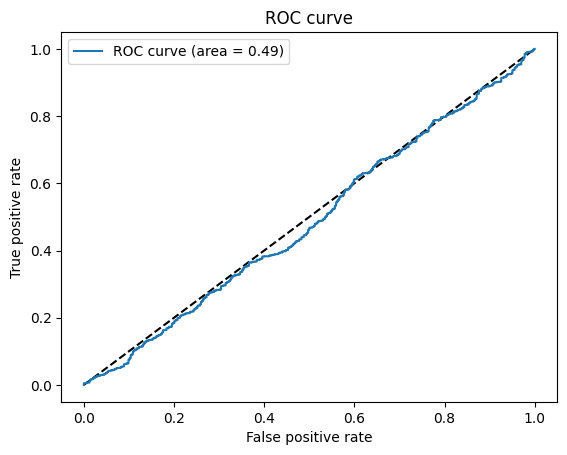

In [30]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(val_generator)
fpr, tpr, thresholds = roc_curve(val_generator.classes, y_pred_proba)

roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

DAY 05

hw to predict on New Data

hw to Create Portfolio Assets

hw to present Results


In [55]:
from google.colab import files
uploaded= files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'cat.jpeg'
img=image.load_img(img_path,target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = model.predict(img_array)
print("prediction class:","Dog" if prediction[0][0] > 0.5  else "Cat")

Saving dog.jpeg to dog (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
prediction class: Dog


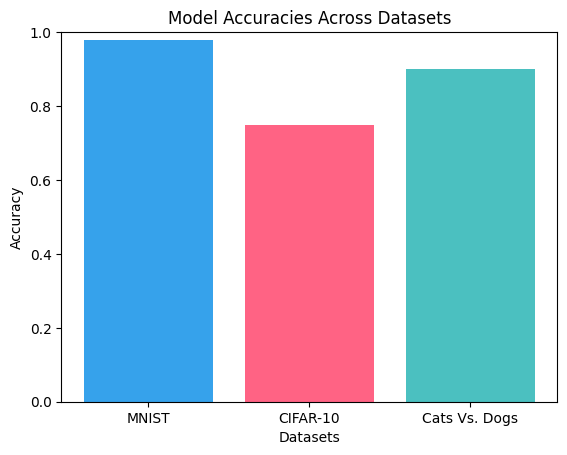

In [37]:
import matplotlib.pyplot as plt
datasets =['MNIST', 'CIFAR-10', 'Cats Vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Across Datasets')
plt.ylim(0,1)
plt.show()